# Notebook used to check the algorithm

We controlled that the roots we obtained using C were the same as in Python, if we used the same algorithm.
We also used the notebook to display the function.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data generation

In [2]:
n = 100

In [3]:
# Set delta as in the paper
rho = 10.0
# delta = np.random.normal(100, 10, n)
delta = np.array([float(n + 1 - i) for i in range(0, n)])
delta = np.sort(delta)
print(delta)

[   2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.
   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.
   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.
   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.
   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.
   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  101.]


In [4]:
# Set zeta
zeta = np.random.normal(5, 1, n)
# zeta = np.array([float(n - i) for i in range(0, n)])
print(zeta)

[ 3.09395907  6.5715229   6.23552137  5.12864643  3.58327692  3.94755779
  4.70494487  5.95731997  6.62643239  4.61699619  5.38257797  4.27158978
  6.63207041  3.62949503  6.26378038  4.07628137  4.87177041  2.95019296
  5.11359815  6.73687264  4.92595674  5.18693132  4.36189378  3.65771348
  4.89868436  6.1676845   4.48662106  5.7795334   5.54486031  5.44037742
  3.68661071  4.66051817  5.11942236  5.60079345  3.97969476  6.90249842
  5.67803321  4.09410346  5.02946021  6.46270351  4.16550736  6.08306899
  5.86061437  5.81011865  5.79409608  5.91760587  5.27919311  4.67232027
  5.80242088  4.40566016  4.4273041   5.13347002  4.73725668  7.1202325
  3.87259085  4.73316558  6.22925955  4.32022523  5.4516041   5.5084798
  5.11209005  5.68367915  3.63010699  4.73749308  6.64585467  4.83596814
  6.17098478  5.51606722  5.92901077  6.95036932  4.30625572  3.85313693
  4.88160435  5.22109869  5.77686511  3.6276479   4.18633059  4.36355599
  6.04378099  5.44736658  6.17645668  5.77328766  3.9

## Functions definition

In [5]:
def spectral_func(rho, delta, zeta, x):
    return rho + np.sum(zeta ** 2 / (delta - x))

In [6]:
def spectral_func_prime(delta, zeta, x):
    return np.sum(zeta ** 2/(delta - x) ** 2)

In [7]:
def g_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = np.delete(delta, [k, k+1])
    zeta_reduced = np.delete(zeta, [k, k+1])
    return spectral_func(rho, delta_reduced, zeta_reduced, x)

In [8]:
def h_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = delta[k : k+2]
    zeta_reduced = zeta[k : k+2]
    return spectral_func(rho, delta_reduced, zeta_reduced, x) - rho

In [9]:
def discriminant_formula_interior(a, b, c):
    if a <= 0:
        return float(a - np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a + np.sqrt(a ** 2 - 4 * b * c))

In [10]:
def discriminant_formula_exterior(a, b, c):
    if a >= 0:
        return float(a + np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a - np.sqrt(a ** 2 - 4 * b * c))

In [11]:
def interior_init(rho, delta, zeta, k):
    middle = float(delta[k] + delta[k+1]) / 2.0
    c = g_spectral_func(rho, delta, zeta, middle, k)
    d = delta[k+1] - delta[k]
    if spectral_func(rho, delta, zeta, middle) >= 0:
        a = c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = zeta[k] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k]
    else:
        a = - c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = - zeta[k + 1] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k + 1]    

In [12]:
def exterior_init(rho, delta, zeta):
    n = delta.shape[0]
    delta_n = delta[n - 1] + np.linalg.norm(zeta) ** 2 / float(rho)
    middle = float(delta[n - 1] + delta_n) / 2.0
    if spectral_func(rho, delta, zeta, middle) <= 0:
        if g_spectral_func(rho, delta, zeta, middle, n - 2) <= - h_spectral_func(rho, delta, zeta, delta_n, n - 2):
            return delta_n
        else:
            d = delta[n - 1] - delta[n - 2]
            c = g_spectral_func(rho, delta, zeta, middle, n - 2)
            a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
            b = - zeta[n - 1] ** 2 * d
            return discriminant_formula_exterior(a, b, c) + delta_n
    else:
        d = delta[n - 1] - delta[n - 2]
        c = g_spectral_func(rho, delta, zeta, middle, n - 2)
        a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
        b = - zeta[n - 1] ** 2 * d
        return discriminant_formula_exterior(a, b, c) + delta_n

In [13]:
y = np.zeros((n, ))
for k in range(0, n-1):
    y[k] = interior_init(rho, delta, zeta, k)
y[n - 1] = exterior_init(rho, delta, zeta)

In [14]:
def spectral_func_second(delta, zeta, x):
    return np.sum(2.0 * zeta ** 2 / (delta - x) ** 3)

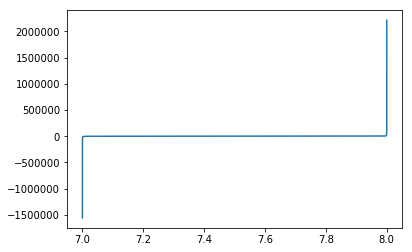

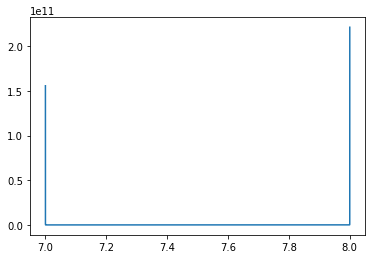

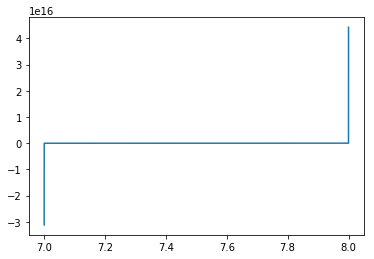

In [15]:
# Plot the functions between delta[k] and delta[k+1]
test_spectral = lambda x: spectral_func(rho, delta, zeta, x)

# Prime derivative
test_spectral_prime = lambda x: spectral_func_prime(delta, zeta, x)

test_spectral_second = lambda x: spectral_func_second(delta, zeta, x)

# Slight perturbation to avoid divergence on the plot
epsilon = 0.00001
k = 5
linspace = np.linspace(delta[k] + epsilon, delta[k+1] - epsilon, 10000)

# Compute the values and plot the original function
values = [test_spectral(x) for x in linspace]
plt.figure()
plt.plot(linspace, values)

# Compute the values and plot the derivative
values_prime = [test_spectral_prime(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Compute the values and plot the second derivative
values_prime = [test_spectral_second(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Show
plt.show()

In [16]:
def abc_gragg_interior(rho, delta, zeta, x, k):
    f = spectral_func(rho, delta, zeta, x)
    fprime = spectral_func_prime(delta, zeta, x)
    fsecond = spectral_func_second(delta, zeta, x)
    delta_k = delta[k] - x
    delta_kplus1 = delta[k+1] - x
    c = f - (delta_k + delta_kplus1) * fprime + delta_k * delta_kplus1 * fsecond / 2.0
    b = delta_k * delta_kplus1 * f
    a = (delta_k + delta_kplus1) * f - delta_k * delta_kplus1 * fprime 
    return a, b, c

In [17]:
def find_root_interior(rho, delta, zeta, x0, k, maxit, epsilon):
    i = 0
    f = 2 * np.sqrt(epsilon)
    x = x0
    while (np.abs(f) > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, k)
        eta = discriminant_formula_interior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    return x

In [18]:
def find_root_exterior(rho, delta, zeta, x0, maxit, epsilon):
    i = 0
    f = 2 * epsilon
    x = x0
    while (np.abs(f) > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, n - 2)
        print(a)
        print(b)
        print(c)
        eta = discriminant_formula_exterior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    print(i)
    return x

## Algorithm test

In [21]:
ytest = []
for k in range(0, n-1):
    ytest.append(find_root_interior(rho, delta, zeta, y[k], k, 10000, 1e-10))

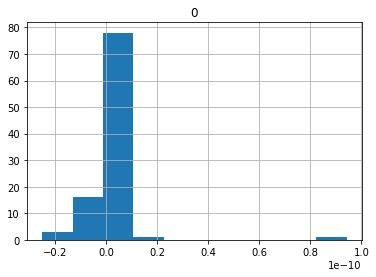

In [31]:
fcontrol = [spectral_func(rho, delta, zeta, t) for t in ytest]
pd.DataFrame(fcontrol).hist()
plt.show()